# Data exploration of experimental events
* https://stackoverflow.com/questions/3684484/peak-detection-in-a-2d-array
## Data import

In [182]:
# Imports
import matplotlib.pyplot as plt
from master_scripts.data_functions import *
from pprint import pprint
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [183]:
# CeBr2Mil_Mix.txt -> 2 million mixed samples of simulated events
REPO_ROOT = get_git_root()
DATA_PATH = REPO_ROOT + "/data/real/anodedata_500k.txt"
DATA_FILENAME = "anodedata_500k.txt"

events, images = import_real_data(DATA_PATH) # images not normalized

In [184]:
# CeBr2Mil_Mix.txt -> 2 million mixed samples of simulated events
# ================== Import Data ==================
#images = np.load(DATA_PATH + "images_full.npy")
#positions = np.load(DATA_PATH + "positions_full.npy")
#energies = np.load(DATA_PATH + "energies_full.npy")
#labels = np.load(DATA_PATH + "labels_full.npy")
images_sim = np.load(REPO_ROOT + "data/simulated/images_260k.npy")
positions_sim = np.load(REPO_ROOT + "data/simulated/positions_260k.npy")
energies_sim = np.load(REPO_ROOT + "data/simulated/energies_260k.npy")
labels_sim = np.load(REPO_ROOT + "data/simulated/labels_260k.npy")
single_sim, double_sim, close_sim = event_indices(positions_sim)
print(f"S: {single_sim.shape}, D: {double_sim.shape}, C: {close_sim.shape}")

S: (130279,), D: (129868,), C: (1809,)


# Basic statistical properties
Means, standard deviations etc.

## Images
num_observations, (min, max), mean, variance, skewness, kurtosis

In [185]:
decays = [e['image_idx'] for e in events.values() if e['event_descriptor'] == 2]

In [186]:
stats_images = stats.describe(images[decays])
stats_images_sim = stats.describe(images_sim)

In [187]:
# Print maximum and minimum pixel values seen in image data
print("{:15s}|{:^15s}|{:^15s}|{:^15s}|{:^15s}".format(
    "Image set",
    "pixel min",
    "pixel max",
    "pixel mean",
    "pixel STD (mean)"))
print("{:15s}|{:^15.2f}|{:^15.2f}|{:^15.2f}|{:^15.2f}".format(
    "Exp", 
    np.amin(stats_images.minmax[0]),
    np.amax(stats_images.minmax[1]),
    np.mean(stats_images.mean),
    np.mean(np.sqrt(stats_images.variance))))
print("{:15s}|{:^15.2f}|{:^15.2f}|{:^15.2f}|{:^15.2f}".format(
    "Sim", 
    np.amin(stats_images_sim.minmax[0]),
    np.amax(stats_images_sim.minmax[1]),
    np.mean(stats_images_sim.mean),
    np.mean(np.sqrt(stats_images_sim.variance))))

Image set      |   pixel min   |   pixel max   |  pixel mean   |pixel STD (mean)
Exp            |     0.00      |    8530.83    |    226.38     |    337.86     
Sim            |     0.00      |   11835.00    |    157.58     |    429.79     


## Highest intensity pixel heatmap
Extract the positions of highest intensity pixels across the dataset and plot the
resulting heatmap

## Where do "dead" pixels occur
Extract the positions of "dead" pixels across the dataset and plot the
resulting heatmap, annotated with ratio of images where the pixel is zero

# Distribution comparisons between sim and exp
Though we lack true values for energies, positions, and labels for experimental data, 

In [188]:
images = normalize_image_data(images[decays])
images_sim = normalize_image_data(images_sim)

In [189]:
img_sum = np.sum(images, axis=(1,2))
img_hip = np.amax(images, axis=(1,2))
img_sum_sim = np.sum(images_sim, axis=(1,2))
img_hip_sim = np.amax(images_sim, axis=(1,2))

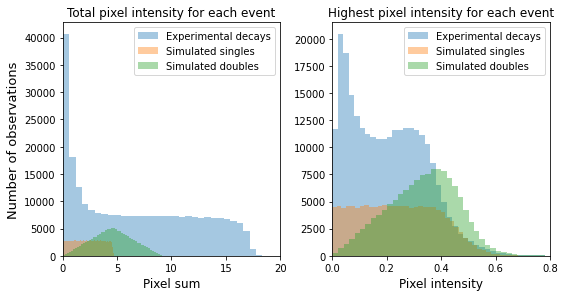

In [191]:

fig, ax = plt.subplots(1, 2, figsize=(8,4))

# Sum all
sns.distplot(img_sum, kde=False, label='Experimental decays', ax=ax.flatten()[0])
#sns.distplot(img_sum_sim, kde=False, label='Simulated decays', ax=ax.flatten()[0])
ax.flatten()[0].set_ylabel("Number of observations", fontsize=13)
#ax.flatten()[0].set_xlabel("Pixel sum", fontsize=12)
ax.flatten()[0].set_title("Total pixel intensity for each event")
ax.flatten()[0].legend()

# HIP all
sns.distplot(img_hip, kde=False, label='Experimental decays', ax=ax.flatten()[1])
#sns.distplot(img_hip_sim, kde=False, label='Simulated decays', ax=ax.flatten()[1])
ax.flatten()[1].set_title("Highest pixel intensity for each event")
ax.flatten()[1].legend()
fig.tight_layout()


#fig1, ax1 = plt.subplots(1, 2, figsize=(8,5), sharey=True)
# Sum single/double
sns.distplot(img_sum_sim[single_sim], kde=False, label='Simulated singles', ax=ax.flatten()[0])
sns.distplot(img_sum_sim[double_sim], kde=False, label='Simulated doubles', ax=ax.flatten()[0])
#x.flatten()[0].set_ylabel("Number of observations", fontsize=13)
ax.flatten()[0].set_xlabel("Pixel sum", fontsize=12)
ax.flatten()[0].legend()


# HIP single/double
sns.distplot(img_hip_sim[single_sim], kde=False, label='Simulated singles', ax=ax.flatten()[1])
sns.distplot(img_hip_sim[double_sim], kde=False, label='Simulated doubles', ax=ax.flatten()[1])
ax.flatten()[1].set_xlabel("Pixel intensity", fontsize=12)
ax.flatten()[1].legend()

ax.flatten()[0].set_xlim(0, 20)
#ax.flatten()[0].ticklabel_format(axis='x', scilimits=(3,3))
ax.flatten()[1].set_xlim(0, 0.8)
#ax.flatten()[1].ticklabel_format(axis='x', scilimits=(3,3))

fig1.tight_layout()

In [196]:
img_hip = img_hip.reshape(img_hip.shape[0])
img_sum = img_sum.reshape(img_sum.shape[0])

img_hip_sim = img_hip_sim.reshape(img_hip_sim.shape[0])
img_sum_sim = img_sum_sim.reshape(img_sum_sim.shape[0])

Sim: 11.693386007924477x + -0.5177085664237217
Exp: 36.049322173939224x + -0.5177085664237217


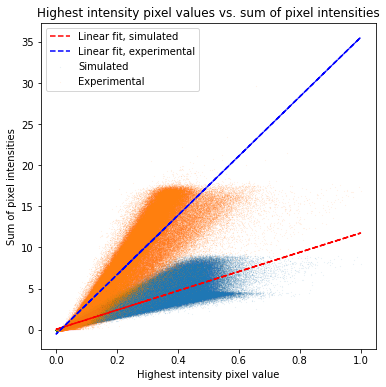

In [197]:
fig, ax = plt.subplots(figsize=(6,6))
a_sim, b_sim = np.polyfit(img_hip_sim, img_sum_sim, 1)
a_exp, b_exp = np.polyfit(img_hip, img_sum, 1)

ax.scatter(img_hip_sim, img_sum_sim, label='Simulated', s=0.001,)
ax.plot(img_hip_sim, a_sim*img_hip_sim + b_sim, '--r', label='Linear fit, simulated')
ax.scatter(img_hip, img_sum, label='Experimental', s=0.001)
ax.plot(img_hip, a_exp*img_hip + b_exp, '--b', label='Linear fit, experimental')
ax.set_xlabel("Highest intensity pixel value")
ax.set_ylabel("Sum of pixel intensities")
ax.set_title("Highest intensity pixel values vs. sum of pixel intensities")
ax.legend()

print(f"Sim: {a_sim}x + {b_exp}")
print(f"Exp: {a_exp}x + {b_exp}")


In [198]:
custom_ex_id = "35afebe71164"
custom_model = tf.keras.models.load_model(REPO_ROOT + "models/" + custom_ex_id + ".h5", compile=False)
#custom_test = classification_metrics(custom_model, images, events, "custom_test")
predictions = custom_model.predict(images)
#del custom_model

S: 55313, 0.21262209443122543 | D: 204834, 0.7873779055687746 |


/home/geir/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


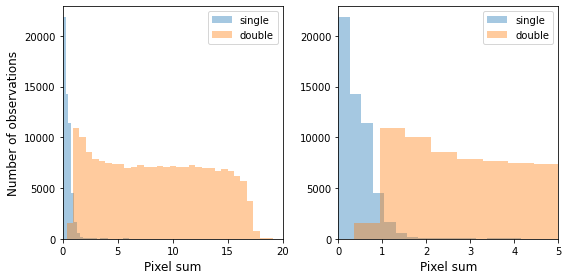

In [199]:
single = (predictions <= 0.5)
double = (predictions > 0.5)
n_single = np.sum(single.astype(int))
n_double = np.sum(double.astype(int))
n_tot = n_single + n_double
print(f"S: {n_single}, {n_single/n_tot} | D: {n_double}, {n_double/n_tot} |")

img_sum = np.sum(images, axis=(1,2))
img_hip = np.amax(images, axis=(1,2))
fig, ax = plt.subplots(1, 2, figsize=(8,4))

# Sum single/double
sns.distplot(img_sum[single], kde=False, label='single', ax=ax.flatten()[0])
sns.distplot(img_sum[double], kde=False, label='double', ax=ax.flatten()[0])
ax.flatten()[0].set_ylabel("Number of observations", fontsize=12)
ax.flatten()[0].set_xlabel("Pixel sum", fontsize=12)
ax.flatten()[0].legend()
ax.flatten()[0].set_xlim(0, 20)

sns.distplot(img_sum[single], kde=False, label='single', ax=ax.flatten()[1])
sns.distplot(img_sum[double], kde=False, label='double', ax=ax.flatten()[1])
#ax.flatten()[1].set_ylabel("Number of observations", fontsize=12)
ax.flatten()[1].set_xlabel("Pixel sum", fontsize=12)
ax.flatten()[1].legend()
ax.flatten()[1].set_xlim(0, 5)

# HIP single/double
#sns.distplot(img_hip[single], kde=False, label='single', ax=ax.flatten()[1])
#sns.distplot(img_hip[double], kde=False, label='double', ax=ax.flatten()[1])
#ax.flatten()[1].set_xlabel("Pixel intensity", fontsize=12)
#ax.flatten()[1].legend()
#ax.flatten()[1].set_xlim(0, 0.8)

fig.tight_layout()

In [269]:
pixel_sums = np.linspace(0, 20, 50)
counts, bins = np.histogram(img_sum[single], bins=pixel_sums)

[28122 20215  4968   960   210    82    52    52    47    63    37    37
    34    43    53    42    40    39    25    28    27    21    22    24
    13    10    17    10     7     7     3     3     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0] [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


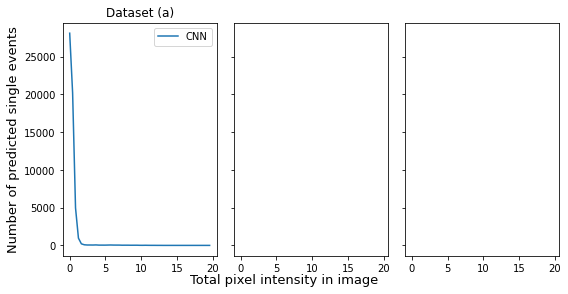

In [284]:
fig, ax = plt.subplots(1,3,figsize=(8, 4), sharex=True, sharey=True)
ax[0].plot(bins[:-1], counts, label="CNN")
#ax[0].set_xlabel("Total pixel intensity in image")
ax[0].set_ylabel("Number of predicted single events", fontsize=13)
ax[0].set_title("Dataset (a)")
ax[0].legend()
fig.text(0.5, 0, "Total pixel intensity in image", ha='center', fontsize=13)
fig.tight_layout()

## Test with scaled single events
Can partially explain problems with double predictions on experimental?

Text(0, 0.5, 'Fraction of correct singles.')

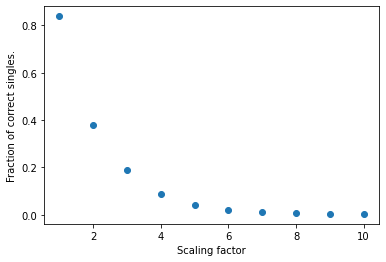

In [194]:
a_factors = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
predicted_singles = []
for a in a_factors:
    pred = custom_model.predict((images_sim[single_sim]*a).reshape(single_sim.shape[0], 16, 16, 1))
    pred_s = np.sum((pred <= 0.5).astype(int))
    predicted_singles.append(pred_s/single_sim.shape[0])
plt.scatter(a_factors, predicted_singles)
plt.xlabel("Scaling factor")
plt.ylabel("Fraction of correct singles.")